In [12]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import minimize
%matplotlib notebook

# Подготовка функции, градиента и матрицы Гессе:

In [2]:
def function_of_cost( x = None, q= None, t = None, a = 0.2, Cc = 12.5, Ci = 0.9, Cx = 0.9, i = 0.1, n = 2, p = 7000):
    if q is None:
        q = x[0]
        t = x[1]
    return Cc + Ci +Cx +2.09*(10**4)*(t**(-0.3017))/360+1.064*(10**6)*a*(t**0.4925)/(52.47*q*360)+\
        (4.242*(10**4)*a*(t**0.7952)+1.813*i*p*(n+1.2*q))/(52.47*q*360)+4.25*(10**3)*a*(n*t+1.2*q)/(52.47*q*360)+\
        5.042*(10**3)*(q**(-0.1899))/360+0.1049*(q**0.671)/360
def hessian(x, a= 0.2, Cc = 12.5, Ci = 0.9, Cx = 0.9, i = 0.1, n = 2, p = 7000):
    q = x[0]
    t = x[1]
    H = np.zeros(shape = (2, 2))
    
    H[0, 0] =  0.000105881/(q**3)*(4250*a*(n*t+1.2*q)+42420*a*t**(0.7952)+1064000*a*t**(0.4925)+1.813*i*p*(n+1.2*q))-\
    0.000105881*(5100*a+2.1756*i*p)/(q**2)+1/360*(1139.3*q**(-2.1899) - 0.0231576*q**(-1.329))
    
    H[1, 0] = H[0,1] = -(0.224996*a*n+27.7418*a*t**(-0.5075)+1.7858*a*t**(-0.2048))/(q**2)
    
    H[1, 1] = 0.0000529403*(-265940*a*t**(-1.5075)-6908.39*a*t**(-1.2048))/q+22.7997*t**(-2.3017)
    return H
def gradient(x, a= 0.2, Cc = 12.5, Ci = 0.9, Cx = 0.9, i = 0.1, n = 2, p = 7000):
    q = x[0]
    t = x[1]
    grad = [0, 0]
    grad[0] = -0.0000529403/(q**2)*(4250*a*(n*t+1.2*q)+42420*a*t**(0.7952)+1064000*a*t**(0.4925)+1.8313*i*p*(n+1.2*q))+\
    0.0000529403*(5100*a+2.1756*i*p)/q+1/360*(0.0703879*q**(-0.329)-957.476*(q**(-1.1899)))
    grad[1] = 0.0000529403*(4250*a*n+524020*a*t**(-0.5075)+33732.4*a*t**(-0.2048))/(q)-17.5154*t**(-1.3017)
    return np.array(grad)

# Безусловная оптимизация:

In [16]:
q = np.linspace(100000, 300000, 100)
t = np.linspace(300000, 600000, 100)
q, t= np.meshgrid(q, t)
z = function_of_cost(q = q, t = t)
zmin = np.min(z)
zmin

18.303228838459546

<IPython.core.display.Javascript object>


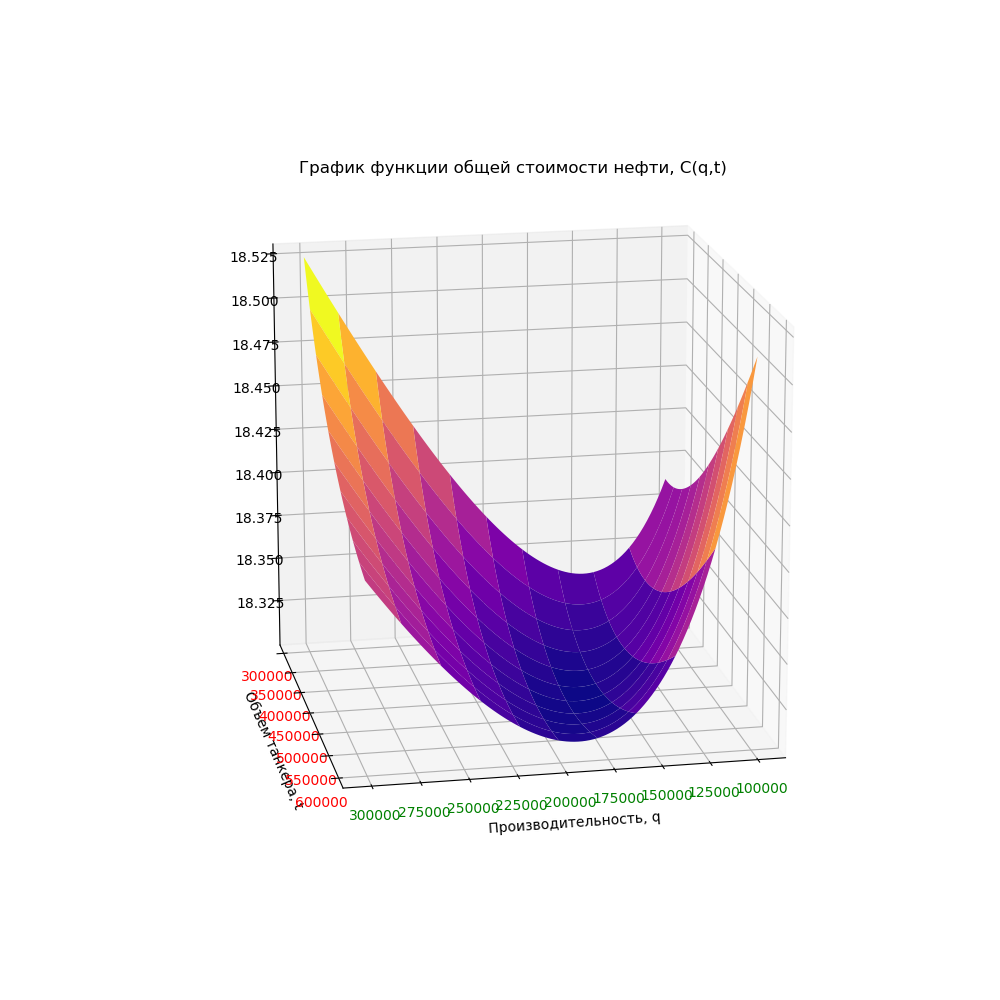

In [17]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')
ax.tick_params(axis='x', which='major', direction='inout',
                bottom=True, top=False, left=True, right=False, 
                color='b', labelcolor='g',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.tick_params(axis='y', which='major', direction='inout',
                bottom=True, top=False, left=True, right=False, 
                color='r', labelcolor='red',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)
surf = ax.plot_surface(
        q, t, z, 
        rstride = 10,
        cstride = 10,
        cmap = cm.plasma)
ax.set_xlabel('Производительность, q')
ax.set_ylabel('Объем танкера, t')
plt.title('График функции общей стоимости нефти, C(q,t)')

 Метод Пауэлла:

In [5]:
x0 = np.array([1000, 1000])#начальная точка
res_powell = minimize(function_of_cost, x0, method='powell',
      options={'xtol': 1e-8, 'disp': True})#расчет методом Пауэлла
q_powell = res_powell.x[0]
t_powell = res_powell.x[1]
print('\n')
print('Оптимильная производительность по методу Пауэлла q = {} бар/день'.format(q_powell))
print('Отптимательный объем танкера по методу Пауэлла t = {} кл'.format(t_powell))
print('Погрешность eps = {}'.format(abs(res_powell.fun - zmin)))

Optimization terminated successfully.
         Current function value: 18.303516
         Iterations: 3
         Function evaluations: 146


Оптимильная производительность по методу Пауэлла q = 173281.73547764507 бар/день
Отптимательный объем танкера по методу Пауэлла t = 498601.934523269 кл
Погрешность eps = 0.03143729185320154


C:\Users\Snowfall\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


 Метод Ньютона:

In [6]:
def Newton(fun, x0, eps = None, hess = None, grad = None):
    x = x0
    x_next = 0
    accur = 1
    i = 0
    while(accur >eps):
        x_next = x - np.linalg.inv(hess(x)).dot(grad(x))
        accur = np.abs(fun(x_next) - fun(x))
        x = x_next
        i+=1
    print('Optimization terminated successfully.')
    print('\t Current function value: {}'.format(fun(x)))
    print('\t Iteration: {}'.format(i))
    return(x)
x = np.array([q_powell, t_powell])#начальная точка
res_newton = Newton(function_of_cost, x, eps = 1e-10, hess = hessian, grad = gradient)#расчет методом Ньютона
q_newton = res_newton[0]
t_newton = res_newton[1]
print('Оптимильная производительность по методу Ньютона q = {} бар/день'.format(q_newton))
print('Отптимательный объем танкера по методу Ньютона t = {} кл'.format(t_newton))
print('Погрешность eps = {}'.format(abs(function_of_cost(res_newton) - zmin)))

Optimization terminated successfully.
	 Current function value: 18.303229247614386
	 Iteration: 4
Оптимильная производительность по методу Ньютона q = 175076.96537651462 бар/день
Отптимательный объем танкера по методу Ньютона t = 485276.9315778572 кл
Погрешность eps = 0.03172355029582263


 Симплекс метод:

In [20]:
res = minimize(function_of_cost, x0, method='Nelder-Mead', options={'xtol': 1e-8,'disp': True})#расчет симлекс методлм
print('\n')
print('Оптимильная производительность по симплекс методу q = {} бар/день'.format(res.x[0]))
print('Отптимательный объем танкера по симплекс методу t = {} кл'.format(res.x[1]))
print('Погрешность eps = {}'.format(abs(res.fun - zmin)))

Optimization terminated successfully.
         Current function value: 18.303229
         Iterations: 110
         Function evaluations: 254


Оптимильная производительность по симплекс методу q = 174833.27243150564 бар/день
Отптимательный объем танкера по симплекс методу t = 484726.98832032434 кл
Погрешность eps = 1.579966308895564e-07


# Условная оптимизация:

In [8]:
q = np.linspace(5000, 10000, 100)
t = np.linspace(5000, 150000, 100)
q, t= np.meshgrid(q, t)
z = function_of_cost(q = q, t = t)
zmin = np.min(z)
zmin

20.15300596073575

Вывод графика на экран:

<IPython.core.display.Javascript object>


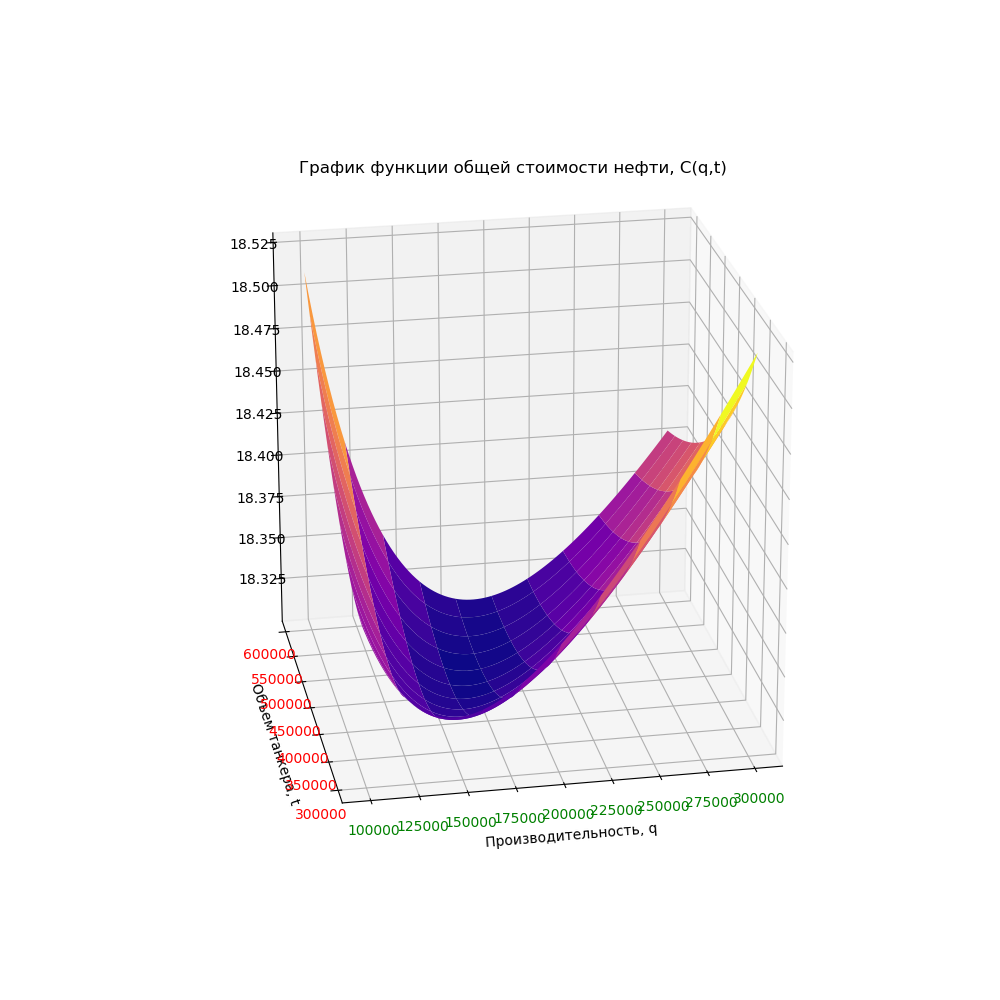

In [19]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')
ax.tick_params(axis='x', which='major', direction='inout',
                bottom=True, top=False, left=True, right=False, 
                color='b', labelcolor='g',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.tick_params(axis='y', which='major', direction='inout',
                bottom=True, top=False, left=True, right=False, 
                color='r', labelcolor='red',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)
surf = ax.plot_surface(
        # отмечаем аргументы и уравнение поверхности
        q, t, z, 
        rstride = 10,
        cstride = 10,
        # цветовая схема plasma
        cmap = cm.plasma)
ax.set_xlabel('Производительность, q')
ax.set_ylabel('Объем танкера, t')
plt.title('График функции общей стоимости нефти, C(q,t)')
plt.show()

Метод множителей Лагранжа:

In [10]:
from scipy.optimize import Bounds
bounds = Bounds ([1, 1], [10000, 150000])#задание ограничений типа неравенств
x0 = np.array([1, 1])#начальная точка
res = minimize(function_of_cost, x0, method='SLSQP', jac=gradient,
               bounds = bounds, options={'ftol': 1e-9, 'disp': True})#расчет методом Лагранжа
print('\n')
print('Оптимильная производительность по методу Лагранжа q = {} бар/день'.format(res.x[0]))
print('Отптимательный объем танкера по методу Лагранжа t = {} кл'.format(res.x[1]))
print('Погрешность eps = {}'.format(abs(res.fun - zmin)))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 20.152978980029932
            Iterations: 40
            Function evaluations: 40
            Gradient evaluations: 40


Оптимильная производительность по методу Лагранжа q = 10000.0 бар/день
Отптимательный объем танкера по методу Лагранжа t = 44911.02358577552 кл
Погрешность eps = 2.6980705818857587e-05


Метод доверительной области:

In [18]:
x0 = np.array([1000, 1000])#Начальная точка
res = minimize(function_of_cost, x0, method='trust-constr', jac=gradient,
               bounds = bounds, options={'verbose': 1})#расчет методом доверительной области
print('\tCurrent function value:{}'.format(res.fun))
print('\n')
print('Оптимильная производительность по методу Лагранжа q = {} бар/день'.format(res.x[0]))
print('Отптимательный объем танкера по методу Лагранжа t = {} кл'.format(res.x[1]))
print('Погрешность eps = {}'.format(abs(res.fun - zmin)))

`gtol` termination condition is satisfied.
Number of iterations: 28, function evaluations: 19, CG iterations: 29, optimality: 2.68e-09, constraint violation: 0.00e+00, execution time: 0.13 s.
	Current function value:20.152979039524226


Оптимильная производительность по методу Лагранжа q = 9999.999583151595 бар/день
Отптимательный объем танкера по методу Лагранжа t = 44904.563480691104 кл
Погрешность eps = 1.8497502010646798
